In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#EDA
from collections import Counter
from pydantic_settings import BaseSettings
import ydata_profiling as pp
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

C:\Users\ethan\AppData\Local\Temp\ipykernel_20392\2452328582.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [19]:
# Assuming you have two datasets stored in CSV files or created as DataFrames
hp_df = pd.read_csv(r'C:\Users\ethan\Downloads\train.csv')

In [20]:
print(hp_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [24]:

# Step 1: Identify columns with string (categorical) data types
# We can do this by checking the data type of each column
categorical_columns = hp_df.select_dtypes(include=['object']).columns

print("\nCategorical columns to drop:")
print(categorical_columns)

# Step 2: Drop the categorical columns
hp_num_df = hp_df.drop(columns=categorical_columns)

print("\nDataFrame after dropping categorical columns:")
print(hp_num_df)


Categorical columns to drop:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

DataFrame after dropping categorical columns:
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0 

In [34]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the DataFrame and transform the data
imputed_hp_numeric_df = pd.DataFrame(imputer.fit_transform(hp_num_df), columns=hp_num_df.columns)

print("\nDataFrame after imputing missing values with the most frequent values:")
print(imputed_hp_numeric_df)


DataFrame after imputing missing values with the most frequent values:
          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1455  1456.0        60.0         62.0   7917.0          6.0          5.0   
1456  1457.0        20.0         85.0  13175.0          6.0          6.0   
1457  1458.0        70.0         66.0   9042.0          7.0          9.0   
1458  1459.0        20.0         68.0   9717.0          5.0          6.0   
1459  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt

In [39]:
# Function to fill NA values with the most frequent value (mode)
def fill_na_with_mode(imputed_hp_numeric_df):
    for column in imputed_hp_numeric_df.columns:
        mode = imputed_hp_numeric_df[column].mode()[0]
        imputed_hp_numeric_df[column].fillna(mode, inplace=True)
    return imputed_hp_numeric_df

# Apply the function to the DataFrame
new_imputed_hp_numeric_df = fill_na_with_mode(imputed_hp_numeric_df.copy())

print("\nDataFrame after imputing missing values with the most frequent values:")
print(new_imputed_hp_numeric_df)



DataFrame after imputing missing values with the most frequent values:
          Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1.0        60.0         65.0   8450.0          7.0          5.0   
1        2.0        20.0         80.0   9600.0          6.0          8.0   
2        3.0        60.0         68.0  11250.0          7.0          5.0   
3        4.0        70.0         60.0   9550.0          7.0          5.0   
4        5.0        60.0         84.0  14260.0          8.0          5.0   
...      ...         ...          ...      ...          ...          ...   
1455  1456.0        60.0         62.0   7917.0          6.0          5.0   
1456  1457.0        20.0         85.0  13175.0          6.0          6.0   
1457  1458.0        70.0         66.0   9042.0          7.0          9.0   
1458  1459.0        20.0         68.0   9717.0          5.0          6.0   
1459  1460.0        20.0         75.0   9937.0          5.0          6.0   

      YearBuilt

C:\Users\ethan\AppData\Local\Temp\ipykernel_20392\1862301037.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imputed_hp_numeric_df[column].fillna(mode, inplace=True)


In [40]:
x = new_imputed_hp_numeric_df.drop('SalePrice', axis=1)    
y = new_imputed_hp_numeric_df['SalePrice']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assuming you have your heart disease dataset loaded into X and y

# Perform oversampling to balance the classes
oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

# Split the resampled data into training and test sets with stratified split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Now you can proceed to train your model using X_train and y_train, and evaluate on X_test and y_test

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

log_reg_model = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lr_predicted = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,lr_predicted)*100,"%")

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Accuracy of Logistic Regression: 57.88084464555053 

              precision    recall  f1-score   support

     34900.0       0.80      1.00      0.89         4
     35311.0       0.67      1.00      0.80         4
     37900.0       0.00      0.00      0.00         4
     39300.0       0.20      1.00      0.33         4
     40000.0       0.22      1.00      0.36         4
     52000.0       0.00      0.00      0.00         4
     52500.0       0.00      0.00      0.00         4
     55000.0       0.00      0.00      0.00         4
     55993.0       1.00      1.00      1.00         4
     58500.0       1.00      1.00      1.00         4
     60000.0       0.00      0.00      0.00         4
     61000.0       0.50      1.00      0.67         4
     62383.0       0.44      1.00      0.62         4
     64500.0       0.57      1.00      0.73        

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.p

In [44]:
knn_model = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,knn_predicted)*100,"%")

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy of K-NeighborsClassifier: 22.77526395173454 

              precision    recall  f1-score   support

     34900.0       1.00      1.00      1.00         4
     35311.0       0.67      1.00      0.80         4
     37900.0       0.13      1.00      0.24         4
     39300.0       1.00      1.00      1.00         4
     40000.0       0.21      1.00      0.35         4
     52000.0       0.20      1.00      0.33         4
     52500.0       0.00      0.00      0.00         4
     55000.0       0.00      0.00      0.00         4
     55993.0       0.21      1.00      0.35         4
     58500.0       0.27      1.00      0.42         4
     60000.0       0.00      0.00      0.00         4
     61000.0       0.22      1.00      0.36         4
     62383.0       0.33      1.00      0.50         4
     64500.0       0.33      1.00      0.50      

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training accuracy score of the model is: 22.93552036199095 %
Testing accuracy score of the model is: 22.77526395173454 %


In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth = 6)
dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

print("Training accuracy score of the model is:", accuracy_score(y_train, dt.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:", accuracy_score(y_test,dt_predicted)*100,"%")

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Accuracy of DecisionTreeClassifier: 9.653092006033184 

              precision    recall  f1-score   support

     34900.0       0.09      1.00      0.16         4
     35311.0       0.09      1.00      0.16         4
     37900.0       0.13      1.00      0.24         4
     39300.0       0.09      1.00      0.16         4
     40000.0       0.11      1.00      0.20         4
     52000.0       0.08      1.00      0.15         4
     52500.0       0.00      0.00      0.00         4
     55000.0       0.00      0.00      0.00         4
     55993.0       0.00      0.00      0.00         4
     58500.0       0.12      1.00      0.22         4
     60000.0       0.00      0.00      0.00         4
     61000.0       0.00      0.00      0.00         4
     62383.0       0.10      1.00      0.18         4
     64500.0       0.00      0.00      0.00     

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [46]:
nb_model = 'Naive Bayes'
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predicted = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
nb_acc_score = accuracy_score(y_test, nb_predicted)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nb_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, nb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,nb_predicted)*100,"%")

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Accuracy of Naive Bayes model: 86.19909502262443 

              precision    recall  f1-score   support

     34900.0       1.00      1.00      1.00         4
     35311.0       1.00      1.00      1.00         4
     37900.0       1.00      1.00      1.00         4
     39300.0       1.00      1.00      1.00         4
     40000.0       1.00      1.00      1.00         4
     52000.0       1.00      1.00      1.00         4
     52500.0       1.00      1.00      1.00         4
     55000.0       1.00      1.00      1.00         4
     55993.0       1.00      1.00      1.00         4
     58500.0       1.00      1.00      1.00         4
     60000.0       0.67      1.00      0.80         4
     61000.0       1.00      1.00      1.00         4
     62383.0       1.00      1.00      1.00         4
     64500.0       1.00      1.00      1.00         4

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training accuracy score of the model is: 87.99962292609351 %
Testing accuracy score of the model is: 86.19909502262443 %


In [47]:
rf_model = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state = 12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", rf_acc_score*100,'\n')
print(classification_report(y_test, rf_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, rf.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test, rf_predicted)*100,"%")

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Accuracy of Random Forest: 12.028657616892911 

              precision    recall  f1-score   support

     34900.0       0.44      1.00      0.62         4
     35311.0       1.00      1.00      1.00         4
     37900.0       0.00      0.00      0.00         4
     39300.0       1.00      1.00      1.00         4
     40000.0       0.00      0.00      0.00         4
     52000.0       0.00      0.00      0.00         4
     52500.0       1.00      1.00      1.00         4
     55000.0       0.00      0.00      0.00         4
     55993.0       0.00      0.00      0.00         4
     58500.0       0.00      0.00      0.00         4
     60000.0       1.00      0.25      0.40         4
     61000.0       1.00      1.00      1.00         4
     62383.0       0.00      0.00      0.00         4
     64500.0       0.00      0.00      0.00         4
  

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training accuracy score of the model is: 12.188914027149321 %
Testing accuracy score of the model is: 12.028657616892911 %


In [49]:
xgb_model = 'Extreme Gradient Boost'
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train, y_train)
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,xgb_predicted)*100,"%")

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662], got [ 34900.  35311.  37900.  39300.  40000.  52000.  52500.  55000.  55993.
  58500.  60000.  61000.  62383.  64500.  66500.  67000.  68400.  68500.
  72500.  73000.  75000.  75500.  76000.  76500.  78000.  79000.  79500.
  79900.  80000.  80500.  81000.  82000.  82500.  83000.  83500.  84000.
  84500.  84900.  85000.  85400.  85500.  86000.  87000.  87500.  88000.
  89000.  89471.  89500.  90000.  90350.  91000.  91300.  91500.  92000.
  92900.  93000.  93500.  94000.  94500.  94750.  95000.  96500.  97000.
  97500.  98000.  98300.  98600.  99500.  99900. 100000. 101000. 101800.
 102000. 102776. 103000. 103200. 103600. 104000. 104900. 105000. 105500.
 105900. 106000. 106250. 106500. 107000. 107400. 107500. 107900. 108000.
 108480. 108500. 108959. 109000. 109008. 109500. 109900. 110000. 110500.
 111000. 111250. 112000. 112500. 113000. 114500. 114504. 115000. 116000.
 116050. 116500. 116900. 117000. 117500. 118000. 118400. 118500. 118858.
 118964. 119000. 119200. 119500. 119750. 119900. 120000. 120500. 121000.
 121500. 121600. 122000. 122500. 122900. 123000. 123500. 123600. 124000.
 124500. 124900. 125000. 125500. 126000. 126175. 126500. 127000. 127500.
 128000. 128200. 128500. 128900. 128950. 129000. 129500. 129900. 130000.
 130250. 130500. 131000. 131400. 131500. 132000. 132250. 132500. 133000.
 133500. 133700. 133900. 134000. 134432. 134450. 134500. 134800. 134900.
 135000. 135500. 135750. 135900. 135960. 136000. 136500. 136900. 136905.
 137000. 137450. 137500. 137900. 138000. 138500. 138800. 138887. 139000.
 139400. 139500. 139600. 139900. 139950. 140000. 140200. 141000. 141500.
 142000. 142125. 142500. 142600. 142953. 143000. 143250. 143500. 143750.
 143900. 144000. 144152. 144500. 144900. 145000. 145250. 145500. 145900.
 146000. 146500. 146800. 147000. 147400. 147500. 148000. 148500. 148800.
 149000. 149300. 149350. 149500. 149700. 149900. 150000. 150500. 150750.
 150900. 151000. 151400. 151500. 152000. 153000. 153337. 153500. 153575.
 153900. 154000. 154300. 154500. 154900. 155000. 155835. 155900. 156000.
 156500. 156932. 157000. 157500. 157900. 158000. 158500. 158900. 159000.
 159434. 159500. 159895. 159950. 160000. 160200. 161000. 161500. 161750.
 162000. 162500. 162900. 163000. 163500. 163900. 163990. 164000. 164500.
 164700. 164900. 164990. 165000. 165150. 165400. 165500. 165600. 166000.
 167000. 167240. 167500. 167900. 168000. 168500. 169000. 169500. 169900.
 169990. 170000. 171000. 171500. 171750. 171900. 172000. 172400. 172500.
 172785. 173000. 173500. 173733. 173900. 174000. 174500. 174900. 175000.
 175500. 175900. 176000. 176432. 176485. 176500. 177000. 177500. 178000.
 178400. 178740. 178900. 179000. 179200. 179400. 179500. 179540. 179600.
 179665. 179900. 180000. 180500. 181000. 181134. 181500. 181900. 182000.
 182900. 183000. 183200. 183500. 183900. 184000. 184100. 184750. 184900.
 185000. 185500. 185750. 185850. 185900. 186000. 186500. 186700. 187000.
 187100. 187500. 187750. 188000. 188500. 188700. 189000. 189950. 190000.
 191000. 192000. 192140. 192500. 193000. 193500. 193879. 194000. 194201.
 194500. 194700. 195000. 195400. 196000. 196500. 197000. 197500. 197900.
 198500. 198900. 199900. 200000. 200100. 200141. 200500. 200624. 201000.
 201800. 202500. 202665. 202900. 203000. 204000. 204750. 204900. 205000.
 205950. 206000. 206300. 206900. 207000. 207500. 208300. 208500. 208900.
 209500. 210000. 211000. 212000. 212900. 213000. 213250. 213490. 213500.
 214000. 214500. 214900. 215000. 215200. 216000. 216500. 216837. 217000.
 217500. 218000. 219210. 219500. 220000. 221000. 221500. 222000. 222500.
 223000. 223500. 224000. 224500. 224900. 225000. 226000. 226700. 227000.
 227680. 227875. 228000. 228500. 228950. 229000. 229456. 230000. 230500.
 231500. 232000. 232600. 233000. 233170. 233230. 234000. 235000. 235128.
 236000. 236500. 237000. 237500. 238000. 239000. 239500. 239686. 239799.
 239900. 240000. 241000. 241500. 242000. 243000. 244000. 244400. 244600.
 245000. 245350. 245500. 246578. 248000. 248328. 248900. 249700. 250000.
 250580. 251000. 252000. 252678. 253000. 253293. 254000. 254900. 255000.
 255500. 255900. 256000. 256300. 257000. 257500. 258000. 259000. 259500.
 260000. 260400. 261500. 262000. 262280. 262500. 263000. 263435. 264132.
 264561. 265000. 265900. 265979. 266000. 266500. 267000. 268000. 269500.
 269790. 270000. 271000. 271900. 272000. 274000. 274300. 274725. 274900.
 274970. 275000. 275500. 276000. 277000. 277500. 278000. 279500. 280000.
 281000. 281213. 282922. 283463. 284000. 285000. 286000. 287000. 287090.
 289000. 290000. 293077. 294000. 295000. 295493. 297000. 299800. 301000.
 301500. 302000. 303477. 305000. 305900. 306000. 307000. 309000. 310000.
 311500. 311872. 312500. 313000. 314813. 315000. 315500. 315750. 316600.
 317000. 318000. 318061. 319000. 319900. 320000. 324000. 325000. 325300.
 325624. 326000. 328000. 328900. 333168. 335000. 336000. 337000. 337500.
 339750. 340000. 341000. 342643. 345000. 348000. 350000. 354000. 359100.
 360000. 361919. 367294. 369900. 370878. 372402. 372500. 374000. 375000.
 377426. 377500. 378500. 380000. 381000. 383970. 385000. 386250. 392000.
 392500. 394432. 394617. 395000. 395192. 402000. 402861. 403000. 410000.
 412500. 415298. 423000. 424870. 426000. 430000. 437154. 438780. 440000.
 446261. 451950. 465000. 466500. 475000. 485000. 501837. 538000. 555000.
 556581. 582933. 611657. 625000. 745000. 755000.]

In [50]:
from sklearn.svm import SVC

svm_model = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,svc_predicted)*100,"%")

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Accuracy of Support Vector Classifier: 62.745098039215684 

              precision    recall  f1-score   support

     34900.0       1.00      1.00      1.00         4
     35311.0       0.80      1.00      0.89         4
     37900.0       1.00      1.00      1.00         4
     39300.0       1.00      1.00      1.00         4
     40000.0       0.57      1.00      0.73         4
     52000.0       1.00      1.00      1.00         4
     52500.0       1.00      1.00      1.00         4
     55000.0       1.00      1.00      1.00         4
     55993.0       0.67      1.00      0.80         4
     58500.0       0.80      1.00      0.89         4
     60000.0       0.00      0.00      0.00         4
     61000.0       0.33      1.00      0.50         4
     62383.0       0.67      1.00      0.80         4
     64500.0       0.57      1.00      0.73 

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training accuracy score of the model is: 62.961915535444945 %
Testing accuracy score of the model is: 62.745098039215684 %


In [51]:
scv=StackingCVClassifier(classifiers=[lr, knn, dt, nb, rf, svc],meta_classifier= rf,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

confusion matrix
[[4 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]


Accuracy of StackingCVClassifier: 7.7300150829562595 

              precision    recall  f1-score   support

     34900.0       0.80      1.00      0.89         4
     35311.0       0.50      1.00      0.67         4
     37900.0       1.00      1.00      1.00         4
     39300.0       1.00      1.00      1.00         4
     40000.0       0.50      1.00      0.67         4
     52000.0       0.00      0.00      0.00         4
     52500.0       1.00      1.00      1.00         4
     55000.0       1.00      1.00      1.00         4
     55993.0       1.00      1.00      1.00         4
     58500.0       1.00      1.00      1.00         4
     60000.0       1.00      0.25      0.40         4
     61000.0       0.50      1.00      0.67         4
     62383.0       0.00      0.00      0.00         4
     64500.0       1.00      1.00      1.00      

c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [54]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree', 'Stacking CV'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100,scv_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,57.880845
1,Naive Bayes,86.199095
2,Random Forest,12.028658
3,K-Nearest Neighbour,22.775264
4,Decision Tree,9.653092
5,Stacking CV,7.730015


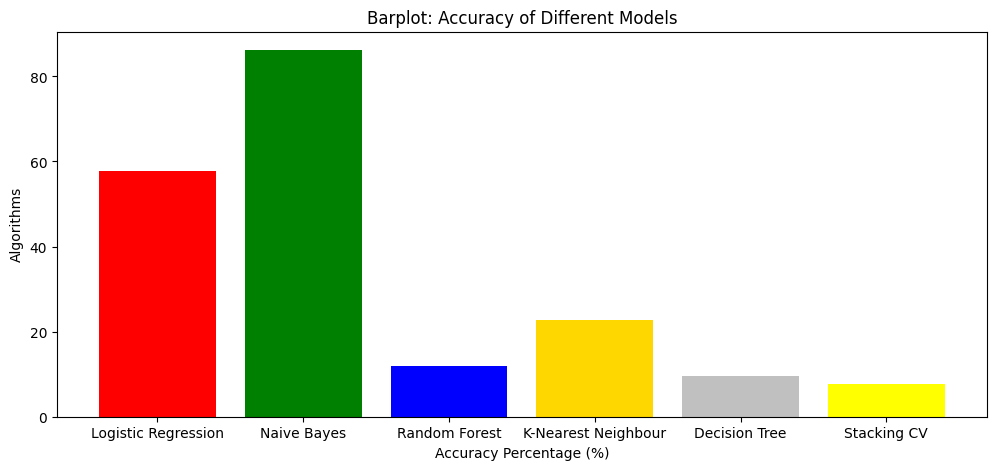

In [55]:
colors = ['red','green','blue','gold','silver','yellow','orange']
plt.figure(figsize=(12,5))
plt.title("Barplot: Accuracy of Different Models")
plt.xlabel("Accuracy Percentage (%)")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'], color = colors)
plt.show()